# Importar Librarias y datos

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   
import itertools

from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf 

In [143]:
df = pd.read_parquet("output_06.parquet")

In [144]:
df.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,tax_status,gains,losses,stocks_status,citizenship,migration_year,country_of_birth_own,migration_code_change_in_msa,migration_code_change_in_reg,income_above_limit
0,79,1,secondary_complete,Widowed,White,All other,Not in labor force,0,0,52,...,Head of household,0,0,292,Native,95,US,?,?,0
1,65,1,secondary_complete,Widowed,White,All other,Children or Armed Forces,0,0,0,...,Single,0,0,0,Native,94,US,unchanged,unchanged,0
2,21,0,secondary_incomplete,Never married,Black,All other,Children or Armed Forces,0,500,15,...,Single,0,0,0,Native,94,US,unchanged,unchanged,0
3,2,1,child,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,...,Nonfiler,0,0,0,Native,94,US,unchanged,unchanged,0
4,70,0,secondary_complete,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,Joint both 65+,0,0,0,Native,95,US,?,?,0


# Normalización de datos

In [146]:
# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

In [147]:
columnas_numericas

Index(['age', 'gender', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'occupation_code', 'total_employed', 'gains',
       'losses', 'stocks_status', 'migration_year', 'income_above_limit'],
      dtype='object')

In [148]:
#Vemos que en algunas columnas hay mucha diferencia entre algunos valores y sería complicado compararlos
print(df[columnas_numericas].describe())

                 age         gender  employment_stat  wage_per_hour  \
count  209499.000000  209499.000000    209499.000000  209499.000000   
mean       34.518728       0.519258         0.176760      55.433487   
std        22.306738       0.499630         0.555562     276.757327   
min         0.000000       0.000000         0.000000       0.000000   
25%        15.000000       0.000000         0.000000       0.000000   
50%        33.000000       1.000000         0.000000       0.000000   
75%        50.000000       1.000000         0.000000       0.000000   
max        90.000000       1.000000         2.000000    9999.000000   

       working_week_per_year  occupation_code  total_employed          gains  \
count          209499.000000    209499.000000   209499.000000  209499.000000   
mean               23.158850        11.321734        1.956067     435.926887   
std                24.397963        14.460839        2.365154    4696.359500   
min                 0.000000         0.0

In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

In [150]:
# Ver estadísticas descriptivas de las columnas numéricas
print(df[columnas_numericas].describe())

                 age         gender  employment_stat  wage_per_hour  \
count  209499.000000  209499.000000    209499.000000  209499.000000   
mean        0.383541       0.519258         0.088380       0.005544   
std         0.247853       0.499630         0.277781       0.027679   
min         0.000000       0.000000         0.000000       0.000000   
25%         0.166667       0.000000         0.000000       0.000000   
50%         0.366667       1.000000         0.000000       0.000000   
75%         0.555556       1.000000         0.000000       0.000000   
max         1.000000       1.000000         1.000000       1.000000   

       working_week_per_year  occupation_code  total_employed          gains  \
count          209499.000000    209499.000000   209499.000000  209499.000000   
mean                0.445363         0.246125        0.326011       0.004359   
std                 0.469192         0.314366        0.394192       0.046964   
min                 0.000000         0.0

# Matriz de correlación

### Valores de correlación:

- Cercano a 1 → Correlación positiva fuerte (una sube, la otra también).
- Cercano a -1 → Correlación negativa fuerte (una sube, la otra baja).
- Cercano a 0 → No hay correlación.

In [153]:
# Crear la matriz de correlación 
matriz_correlacion = df[columnas_numericas].corr().round(2)

# Mostrar la matriz
matriz_correlacion

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,migration_year,income_above_limit
age,1.00,0.05,-0.00,0.04,0.20,0.12,0.14,0.05,0.06,0.10,0.00,0.14
gender,0.05,1.00,-0.04,-0.02,-0.11,-0.14,-0.05,-0.05,-0.07,-0.01,-0.00,-0.16
employment_stat,-0.00,-0.04,1.00,0.06,0.27,0.23,0.24,0.01,0.02,-0.00,0.01,0.04
wage_per_hour,0.04,-0.02,0.06,1.00,0.19,0.19,0.19,0.00,0.01,-0.01,0.00,0.02
working_week_per_year,0.20,-0.11,0.27,0.19,1.00,0.66,0.75,0.08,0.10,0.01,0.01,0.26
occupation_code,0.12,-0.14,0.23,0.19,0.66,1.00,0.52,0.00,0.04,-0.03,-0.00,0.01
total_employed,0.14,-0.05,0.24,0.19,0.75,0.52,1.00,0.06,0.08,0.01,0.02,0.22
gains,0.05,-0.05,0.01,0.00,0.08,0.00,0.06,1.00,-0.01,0.13,0.01,0.24
losses,0.06,-0.07,0.02,0.01,0.10,0.04,0.08,-0.01,1.00,0.05,-0.00,0.15
stocks_status,0.10,-0.01,-0.00,-0.01,0.01,-0.03,0.01,0.13,0.05,1.00,0.00,0.18


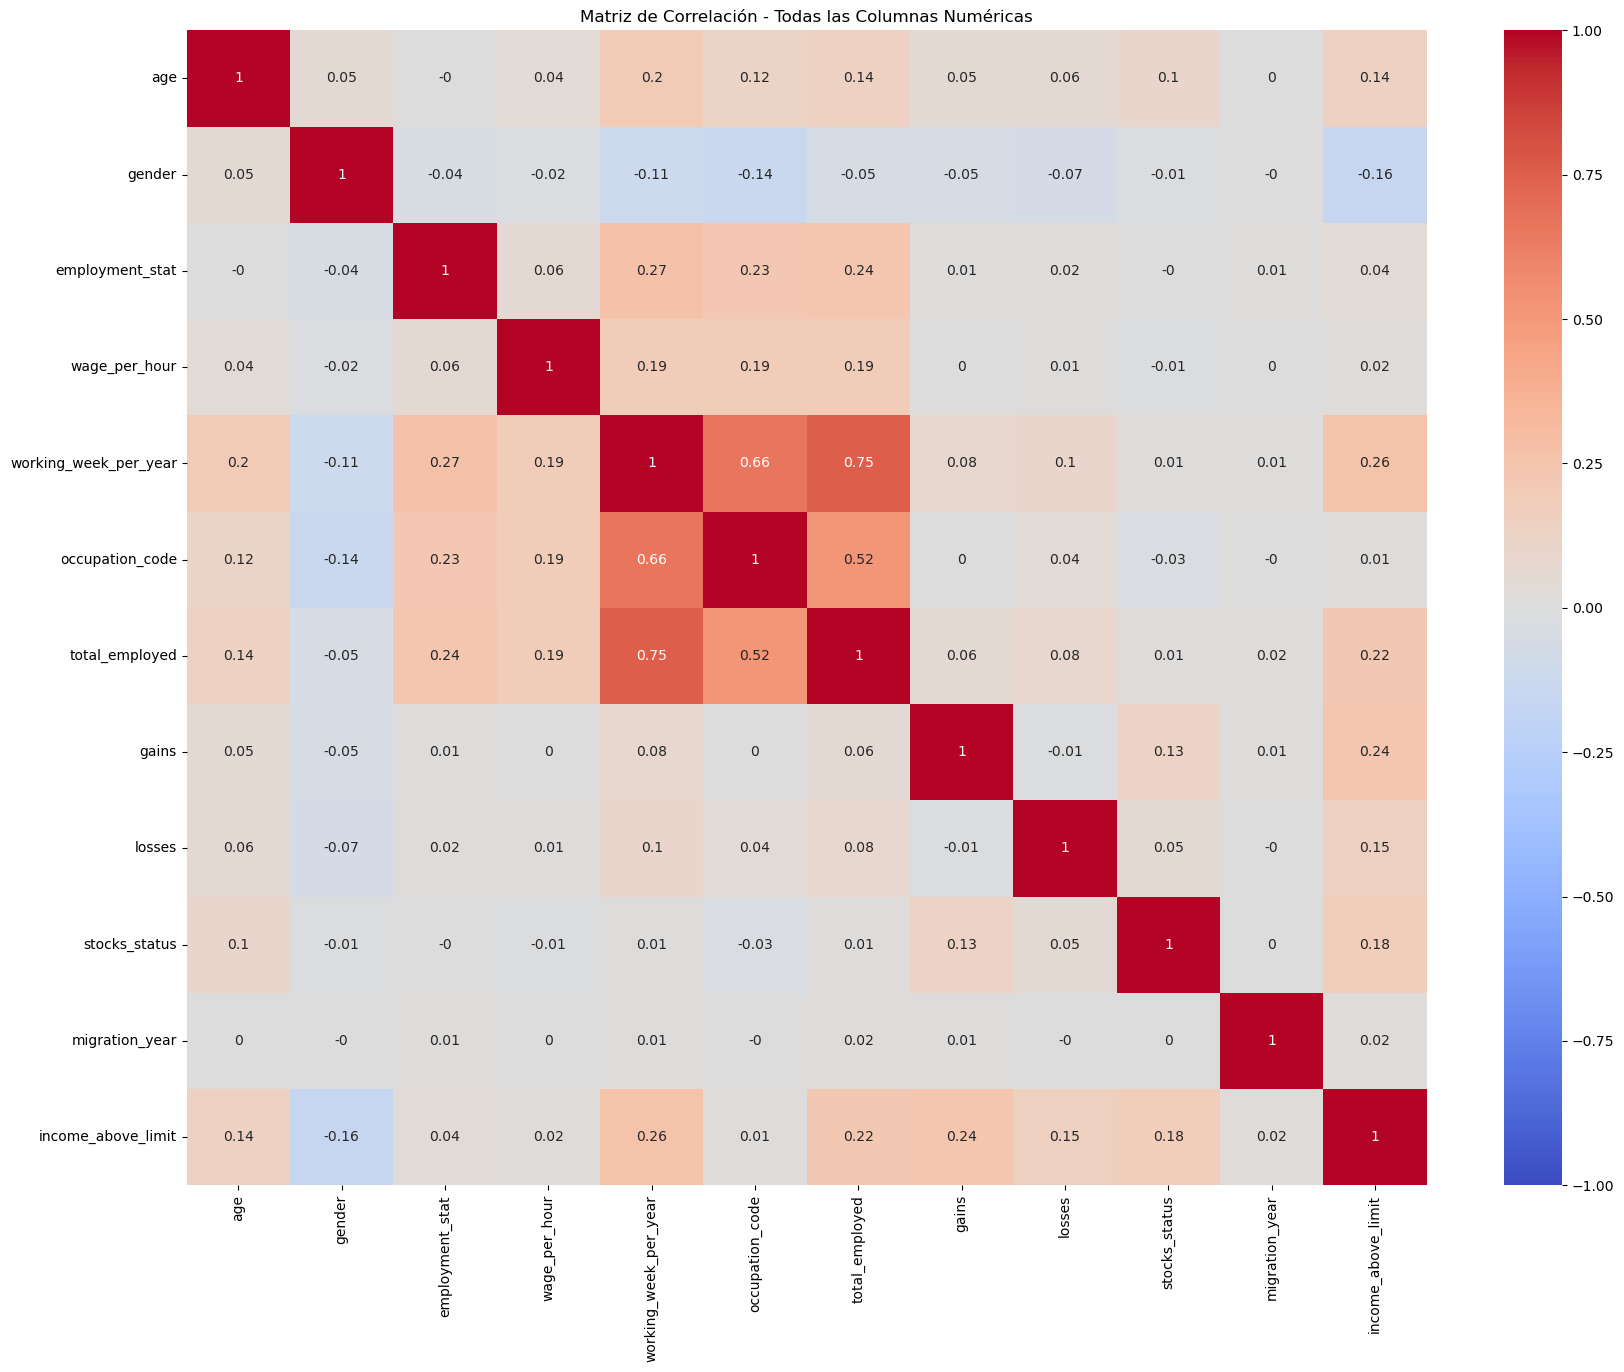

In [154]:
plt.figure(figsize = (20, 15))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title("Matriz de Correlación - Todas las Columnas Numéricas")
plt.show()

In [155]:
filtro_gains = (matriz_correlacion["gains"] > 0.02) | (matriz_correlacion["gains"] < -0.02)
mas_relevantes_gains = matriz_correlacion.loc[filtro_gains, :]
mas_relevantes_gains

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,migration_year,income_above_limit
age,1.00,0.05,-0.00,0.04,0.20,0.12,0.14,0.05,0.06,0.10,0.00,0.14
gender,0.05,1.00,-0.04,-0.02,-0.11,-0.14,-0.05,-0.05,-0.07,-0.01,-0.00,-0.16
working_week_per_year,0.20,-0.11,0.27,0.19,1.00,0.66,0.75,0.08,0.10,0.01,0.01,0.26
total_employed,0.14,-0.05,0.24,0.19,0.75,0.52,1.00,0.06,0.08,0.01,0.02,0.22
gains,0.05,-0.05,0.01,0.00,0.08,0.00,0.06,1.00,-0.01,0.13,0.01,0.24
stocks_status,0.10,-0.01,-0.00,-0.01,0.01,-0.03,0.01,0.13,0.05,1.00,0.00,0.18
income_above_limit,0.14,-0.16,0.04,0.02,0.26,0.01,0.22,0.24,0.15,0.18,0.02,1.00


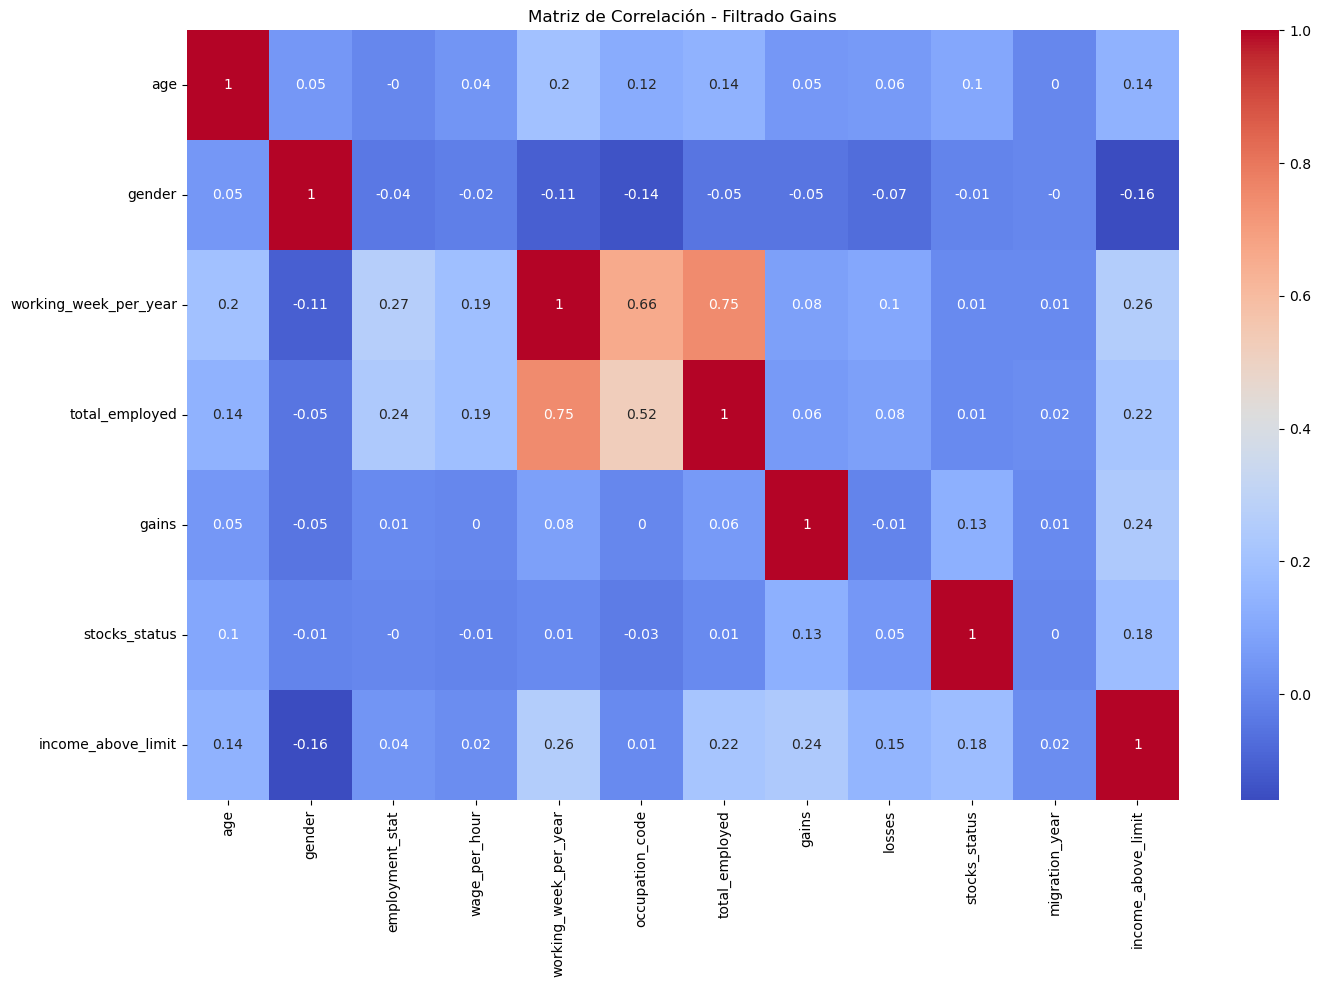

In [156]:
plt.figure(figsize=(16, 10))
sns.heatmap(mas_relevantes_gains, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación - Filtrado Gains")
plt.show()

In [157]:
filtro_losses = (matriz_correlacion["losses"] > 0.02) | (matriz_correlacion["losses"] < -0.02)
mas_relevantes_losses = matriz_correlacion.loc[filtro_losses, :]
mas_relevantes_losses

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,migration_year,income_above_limit
age,1.00,0.05,-0.00,0.04,0.20,0.12,0.14,0.05,0.06,0.10,0.00,0.14
gender,0.05,1.00,-0.04,-0.02,-0.11,-0.14,-0.05,-0.05,-0.07,-0.01,-0.00,-0.16
working_week_per_year,0.20,-0.11,0.27,0.19,1.00,0.66,0.75,0.08,0.10,0.01,0.01,0.26
occupation_code,0.12,-0.14,0.23,0.19,0.66,1.00,0.52,0.00,0.04,-0.03,-0.00,0.01
total_employed,0.14,-0.05,0.24,0.19,0.75,0.52,1.00,0.06,0.08,0.01,0.02,0.22
losses,0.06,-0.07,0.02,0.01,0.10,0.04,0.08,-0.01,1.00,0.05,-0.00,0.15
stocks_status,0.10,-0.01,-0.00,-0.01,0.01,-0.03,0.01,0.13,0.05,1.00,0.00,0.18
income_above_limit,0.14,-0.16,0.04,0.02,0.26,0.01,0.22,0.24,0.15,0.18,0.02,1.00


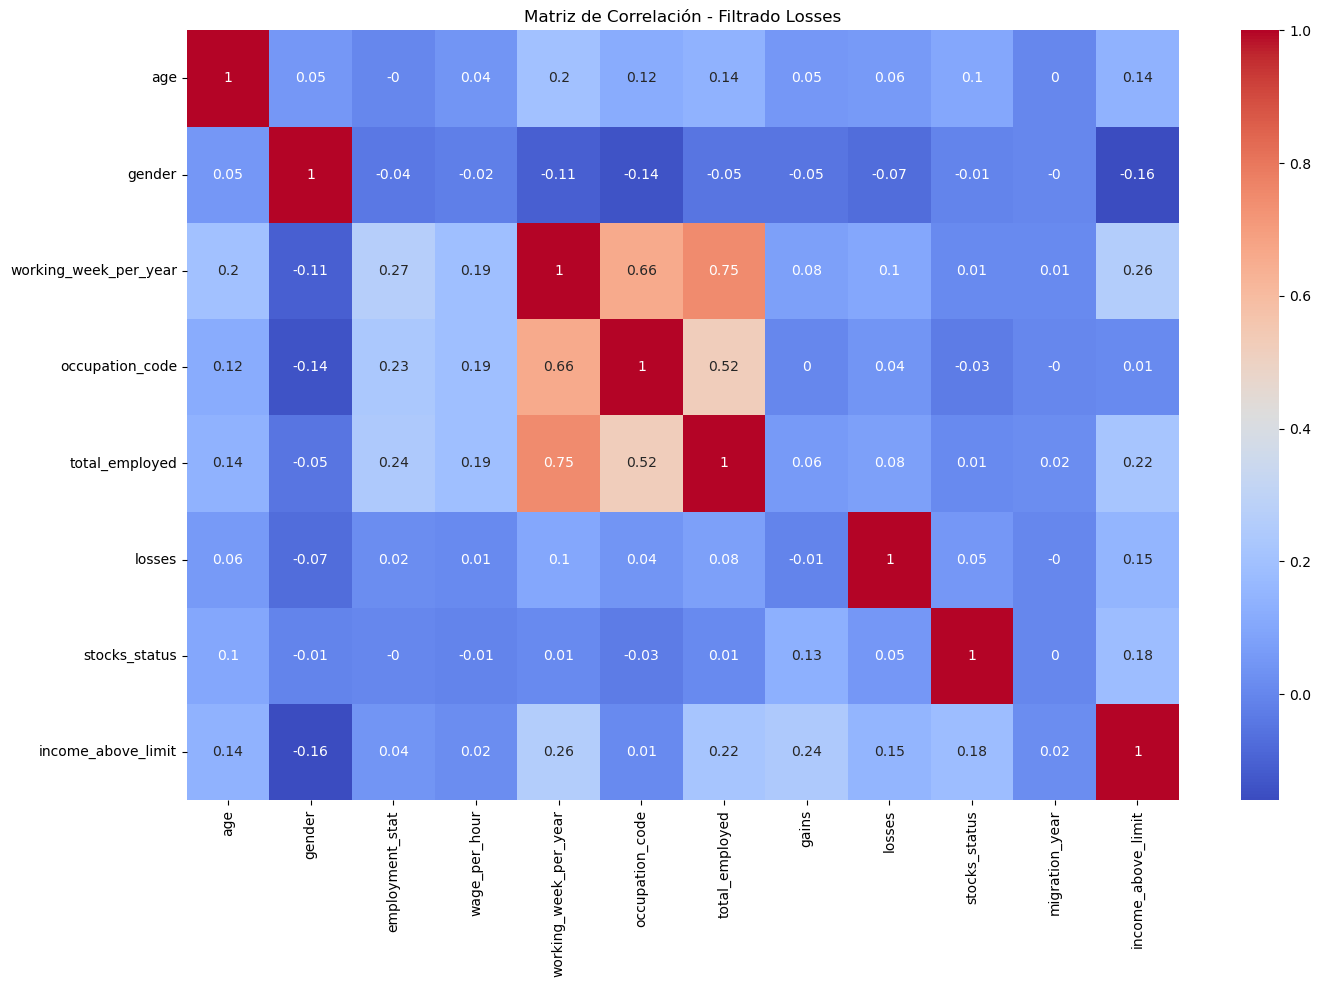

In [158]:
plt.figure(figsize=(16, 10))
sns.heatmap(mas_relevantes_losses, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación - Filtrado Losses")
plt.show()

# Guardar output

In [160]:
df.to_parquet("output_07.parquet")